In [1]:
# importa as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# treino
treino = pd.read_csv('train.csv')
treino.shape

(13730, 167)

In [3]:
# teste
teste = pd.read_csv('test.csv')
teste.shape

(4576, 47)

In [4]:
# quantidade de NaN
treino['NU_NOTA_MT'].isna().sum()

3597

In [5]:
# remove linhas com NaN no target
treino = treino[treino['NU_NOTA_MT'].notna()]
treino.shape

(10133, 167)

In [6]:
# olha quantas colunas têm em comum
colunas_treino = treino.columns
colunas_teste = teste.columns

colunas_comum = list(set(colunas_teste).intersection(colunas_treino))
len(colunas_comum)

47

In [7]:
# lista de possíveis features
colunas_comum.sort()
colunas_comum

['CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_UF_RESIDENCIA',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DISCALCULIA',
 'IN_DISLEXIA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'IN_SABATISTA',
 'IN_SURDEZ',
 'IN_TREINEIRO',
 'NU_IDADE',
 'NU_INSCRICAO',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'SG_UF_RESIDENCIA',
 'TP_ANO_CONCLUIU',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_ENSINO',
 'TP_ESCOLA',
 'TP_LINGUA',
 'TP_NACIONALIDADE',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_SEXO',
 'TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO']

In [8]:
# lista de possíveis features
colunas_comum.sort()
colunas_comum

['CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_UF_RESIDENCIA',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DISCALCULIA',
 'IN_DISLEXIA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'IN_SABATISTA',
 'IN_SURDEZ',
 'IN_TREINEIRO',
 'NU_IDADE',
 'NU_INSCRICAO',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'SG_UF_RESIDENCIA',
 'TP_ANO_CONCLUIU',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_ENSINO',
 'TP_ESCOLA',
 'TP_LINGUA',
 'TP_NACIONALIDADE',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_SEXO',
 'TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO']

In [9]:
# cria lista de features
features = colunas_comum.copy()

# remove as features citadas
r1 = ('CO_PROVA_CH', 'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_INSCRICAO')
for elem in r1:
    features.remove(elem)

len(features)

42

In [10]:
# remove as features de atendimento especializado
r2 = ('IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_DISCALCULIA', 'IN_DISLEXIA', 'IN_GESTANTE',
      'IN_IDOSO', 'IN_SABATISTA', 'IN_SURDEZ', 'IN_TREINEIRO')

for elem in r2:
    features.remove(elem)

len(features)

33

In [11]:
treino[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        10133 non-null  int64  
 1   NU_IDADE                10133 non-null  int64  
 2   NU_NOTA_CH              10097 non-null  float64
 3   NU_NOTA_CN              10097 non-null  float64
 4   NU_NOTA_COMP1           10133 non-null  float64
 5   NU_NOTA_COMP2           10133 non-null  float64
 6   NU_NOTA_COMP3           10133 non-null  float64
 7   NU_NOTA_COMP4           10133 non-null  float64
 8   NU_NOTA_COMP5           10133 non-null  float64
 9   NU_NOTA_LC              10133 non-null  float64
 10  NU_NOTA_REDACAO         10133 non-null  float64
 11  Q001                    10133 non-null  object 
 12  Q002                    10133 non-null  object 
 13  Q006                    10133 non-null  object 
 14  Q024                    10133 non-null

In [12]:
# remove features com dados ausentes
r3 = ('Q027', 'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO')

for elem in r3:
    features.remove(elem)

len(features)

30

In [13]:
# remove feature "duplicada"
features.remove('CO_UF_RESIDENCIA')

len(features)

29

In [14]:
# número de NaN
i1 = ('NU_NOTA_CH', 'NU_NOTA_CN')

for var in i1:
    print(var, treino[var].isna().sum())

NU_NOTA_CH 36
NU_NOTA_CN 36


In [15]:
# substitui os NaN por 0
for var in i1:
    treino[var].fillna(0, inplace = True)

In [16]:
teste[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NU_IDADE           4576 non-null   int64  
 1   NU_NOTA_CH         3442 non-null   float64
 2   NU_NOTA_CN         3442 non-null   float64
 3   NU_NOTA_COMP1      3377 non-null   float64
 4   NU_NOTA_COMP2      3377 non-null   float64
 5   NU_NOTA_COMP3      3377 non-null   float64
 6   NU_NOTA_COMP4      3377 non-null   float64
 7   NU_NOTA_COMP5      3377 non-null   float64
 8   NU_NOTA_LC         3377 non-null   float64
 9   NU_NOTA_REDACAO    3377 non-null   float64
 10  Q001               4576 non-null   object 
 11  Q002               4576 non-null   object 
 12  Q006               4576 non-null   object 
 13  Q024               4576 non-null   object 
 14  Q025               4576 non-null   object 
 15  Q026               4576 non-null   object 
 16  Q047               4576 

In [17]:
# número de NaN
i2 = ('NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
      'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_LC', 'NU_NOTA_REDACAO')

for var in i2:
    print(var, teste[var].isna().sum())

NU_NOTA_CH 1134
NU_NOTA_CN 1134
NU_NOTA_COMP1 1199
NU_NOTA_COMP2 1199
NU_NOTA_COMP3 1199
NU_NOTA_COMP4 1199
NU_NOTA_COMP5 1199
NU_NOTA_LC 1199
NU_NOTA_REDACAO 1199


In [18]:
# substitui os NaN por 0
for var in i2:
    teste[var].fillna(0, inplace = True)

In [19]:
# remove variável com NA apenas nos dados de teste
features.remove('TP_STATUS_REDACAO')

len(features)

28

In [20]:
# remove as indicadoras de presença
features.remove('TP_PRESENCA_CH')
features.remove('TP_PRESENCA_CN')
features.remove('TP_PRESENCA_LC')

len(features)

25

In [21]:
# tipo dos dados das features
treino[features].dtypes

NU_IDADE              int64
NU_NOTA_CH          float64
NU_NOTA_CN          float64
NU_NOTA_COMP1       float64
NU_NOTA_COMP2       float64
NU_NOTA_COMP3       float64
NU_NOTA_COMP4       float64
NU_NOTA_COMP5       float64
NU_NOTA_LC          float64
NU_NOTA_REDACAO     float64
Q001                 object
Q002                 object
Q006                 object
Q024                 object
Q025                 object
Q026                 object
Q047                 object
SG_UF_RESIDENCIA     object
TP_ANO_CONCLUIU       int64
TP_COR_RACA           int64
TP_ESCOLA             int64
TP_LINGUA             int64
TP_NACIONALIDADE      int64
TP_SEXO              object
TP_ST_CONCLUSAO       int64
dtype: object

In [22]:
# ajusta o tipo para object
objs = ('TP_ANO_CONCLUIU', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO')

for var in objs:
    treino[var] = treino[var].astype('category')
    teste[var] = teste[var].astype('category')

In [23]:
# separa o target e as features de treino
x_treino = pd.get_dummies(treino[features])
y_treino = treino['NU_NOTA_MT']

# separa as features de teste e o número de inscrição
x_teste = pd.get_dummies(teste[features])
inscricao_teste = teste['NU_INSCRICAO']
compareceu_prova_lc = teste['TP_PRESENCA_LC']

In [24]:
# formato da base de treino após one-hot encoding
x_treino.shape

(10133, 118)

In [25]:
# formato da base de teste após one-hot encoding
x_teste.shape

(4576, 117)

In [26]:
# diferenças entre as bases de treino e teste
x_treino.columns.difference(x_teste.columns)

Index(['TP_ESCOLA_4'], dtype='object')

In [27]:
# cria a coluna que falta
x_teste['TP_ESCOLA_4'] = 0

In [28]:
x_teste.shape

(4576, 118)

### Modelo

In [29]:
# ajuste do modelo
regressao_linear = LinearRegression()
regressao_linear.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# predição nos dados de teste
pred_regressao_linear = regressao_linear.predict(x_teste)

resultado_regressao_linear = pd.DataFrame({'NU_INSCRICAO': inscricao_teste, 'NU_NOTA_MT': pred_regressao_linear})
resultado_regressao_linear

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,-2.790980e+10
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,-2.790980e+10
2,b38a03232f43b11c9d0788abaf060f7366053b6d,9.107270e+08
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-2.790980e+10
4,715494628a50142ce8cb17191cfe6d0f3cae0934,9.107270e+08
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,5.732027e+08
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,9.107269e+08
4573,655fa6306720ff16e825903b5422a46608a77545,-2.757228e+10
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,-1.412943e+10


In [31]:
# descritivas das predições
resultado_regressao_linear['NU_NOTA_MT'].describe()

count    4.576000e+03
mean    -1.509880e+10
std      1.286987e+10
min     -2.790980e+10
25%     -2.790980e+10
50%     -1.446695e+10
75%      5.732027e+08
max      9.107273e+08
Name: NU_NOTA_MT, dtype: float64

In [32]:
# predição nos dados de treino
pred_treino_regressao_linear = regressao_linear.predict(x_treino)

# cálculo do R2
r2_score(y_treino, pred_treino_regressao_linear)

0.43275868550786634

In [33]:
# mean squared error
mean_squared_error(y_treino, pred_treino_regressao_linear)

5652.169086484233

In [34]:
# mean absolute error
median_absolute_error(y_treino, pred_treino_regressao_linear)

49.64506301879885

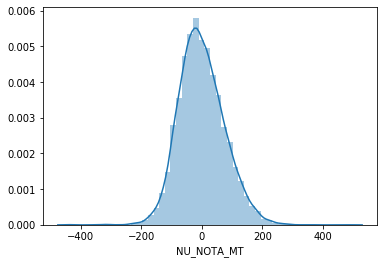

In [35]:
# distribuição dos resíduos
residuos_regressao_linear = y_treino - pred_treino_regressao_linear
sns.distplot(residuos_regressao_linear)

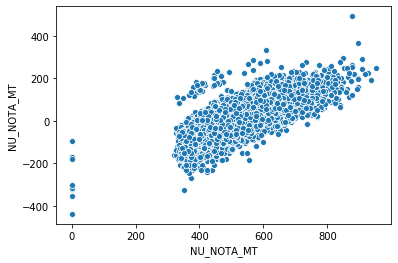

In [36]:
# resíduos versus valor ajustado
sns.scatterplot(x=y_treino, y=residuos_regressao_linear)

In [37]:
# ajusta o modelo
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(x_treino, y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:

# predição nos dados de treino
pred_treino_gbm = gbm.predict(x_treino)

# cálculo do R2
r2_score(y_treino, pred_treino_gbm)

0.5224147515273427

In [39]:
# mean squared error
mean_squared_error(y_treino, pred_treino_gbm)

4758.8081273573725

In [40]:
# mean absolute error
median_absolute_error(y_treino, pred_treino_gbm)

46.02715489333906

In [41]:
# predição nos dados de teste
pred_gbm = gbm.predict(x_teste)

resultado_gbm = pd.DataFrame({'NU_INSCRICAO': inscricao_teste, 'NU_NOTA_MT': pred_gbm, 'TP_PRESENCA_LC': compareceu_prova_lc})
resultado_gbm

,NU_INSCRICAO,NU_NOTA_MT,TP_PRESENCA_LC
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.560057,1
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,472.805043,1
2,b38a03232f43b11c9d0788abaf060f7366053b6d,576.738523,1
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,66.133244,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,534.015210,1
...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,464.885451,1
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,456.885875,1
4573,655fa6306720ff16e825903b5422a46608a77545,680.099369,1
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,436.758109,1


In [42]:
# nota zero para os alunos que não compareceram
for i in range(4576):
    if resultado_gbm.loc[i,'TP_PRESENCA_LC'] == 0:
        resultado_gbm.loc[i,'NU_NOTA_MT'] = 0

In [43]:
# descritivas
resultado_gbm['NU_NOTA_MT'].describe()

count    4576.000000
mean      358.252497
std       220.874523
min         0.000000
25%         0.000000
50%       446.219317
75%       488.462321
max       840.892817
Name: NU_NOTA_MT, dtype: float64

In [49]:
# salva o arquivo de resultado
resultado_gbm.drop(['TP_PRESENCA_LC'], axis=1, inplace=True)

KeyError: "['TP_PRESENCA_LC'] not found in axis"

In [50]:
resultado_gbm.to_csv('answer.csv', index=False)